# Revisiting the Iris Dataset 

Using pandas, seaborn and scilearn we will now reexamine the Iris Dataset we saw last year. 
- Notes and demos from lectures on October 26th 2018.

In [68]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn.neighbors as nei


In [69]:
df = pd.read_csv('iris-data.csv', header = None, 
                 names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal width', 'Species'])

In [70]:
df

Sepal Length  Sepal Width  Petal Length  Petal width         Species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0           1.4          0.1     Iris-setosa
13            4.3          3.0           1.1          0.1     Iris-setosa
14            5.8          4.0           1.2          0.2     Iris-setosa
15            5.7          4.4           1.5          0.4     Iris-setosa
16            5.4          3.9           1.3          0.4     Iris-setosa
17            5.1          3.5           1.4          0.3     Iris-setosa
18            5.7          3.8           1.7          0.3     Iris-setosa
19            5.1          3.8           1.5          0.3     Iris-setosa
20            5.4          3.4           1.7          0.2     Iris-setosa
21            5.1          3.7           1.5          0.4     Iris-setosa
22            4.6          3.6           1.0          0.2     Iris-setosa
23            5.1          3.3           1.7          0.5     Iris-setosa
24            4.8          3.4           1.9          0.2     Iris-setosa
25            5.0          3.0           1.6          0.2     Iris-setosa
26            5.0          3.4           1.6          0.4     Iris-setosa
27            5.2          3.5           1.5          0.2     Iris-setosa
28            5.2          3.4           1.4          0.2     Iris-setosa
29            4.7          3.2           1.6          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
120           6.9          3.2           5.7          2.3  Iris-virginica
121           5.6          2.8           4.9          2.0  Iris-virginica
122           7.7          2.8           6.7          2.0  Iris-virginica
123           6.3          2.7           4.9          1.8  Iris-virginica
124           6.7          3.3           5.7          2.1  Iris-virginica
125           7.2          3.2           6.0          1.8  Iris-virginica
126           6.2          2.8           4.8          1.8  Iris-virginica
127           6.1          3.0           4.9          1.8  Iris-virginica
128           6.4          2.8           5.6          2.1  Iris-virginica
129           7.2          3.0           5.8          1.6  Iris-virginica
130           7.4          2.8           6.1          1.9  Iris-virginica
131           7.9          3.8           6.4          2.0  Iris-virginica
132           6.4          2.8           5.6          2.2  Iris-virginica
133           6.3          2.8           5.1          1.5  Iris-virginica
134           6.1          2.6           5.6          1.4  Iris-virginica
135           7.7          3.0           6.1          2.3  Iris-virginica
136           6.3          3.4           5.6          2.4  Iris-virginica
137           6.4          3.1           5.5          1.8  Iris-virginica
138           6.0          3.0           4.8          1.8  Iris-virginica
139           6.9          3.1           5.4          2.1  Iris-virginica
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142      

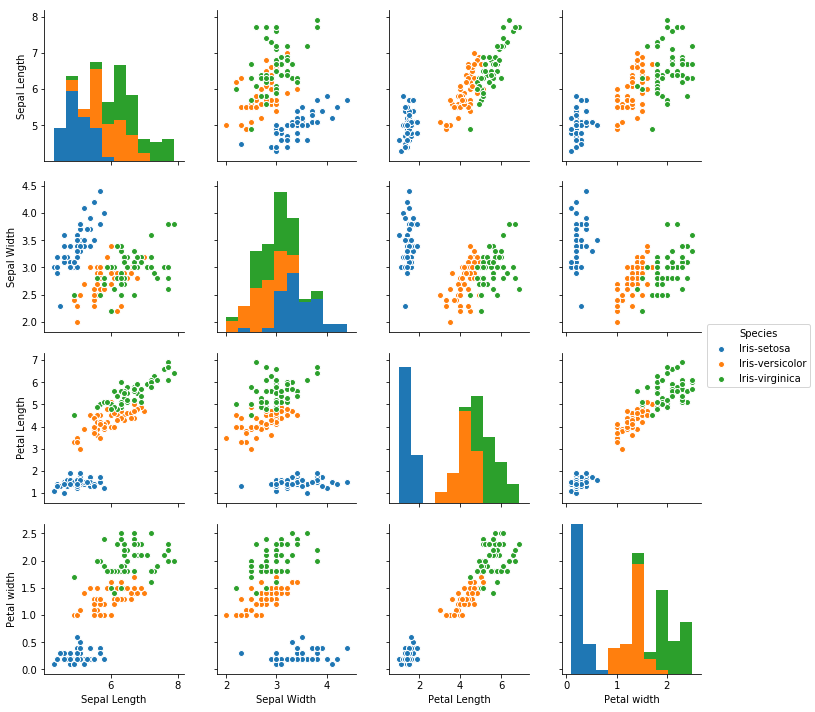

In [71]:
sns.pairplot(df, hue="Species");

## What is classification?

When I was naming the headings in my DataFrame. I referred to the differing species, but let's call the species, three different classes. From the information Ronald Fisher collected, could I classify a random flower as been either Setosa, Virginica and Versicolor, given only its sepal and petal measurements??

This is our classification problem. Can I predict the class based on other variables?

I'll change my DataFrame heading from species to class, to better reflect the problem I'm now looking at. 

In [72]:
df = pd.read_csv('iris-data.csv', header = None, 
                 names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

**What I know about the type of data I have:**
- Length will be a positive float
- Continuous Numerical Data


Whereas the class can only take three values; Setosa, Virginica and Versicolor. This data is categorical nominal.

## K Nearest Neighbours Algorithm

If I was to measure petal length and sepal width of a Iris flower I have found. If I was to plot this on the plot of Petal Length vs Sepal Width I already have from Fisher's data. K nearest neighbors will measure the distance of this point from the 150 other data points. If k is 5, the algorithm will pick the 5 closest points in terms of distance. The class of the majority of points in my nearest neighbors will be the classification of my new point. 

In [102]:
#Plotting Petal Length vs Sepal Width for visualiation
petal_length = np.array(df.iloc[:, 2])
sepal_width = np.array(df.iloc[:, 1])
species = (df.iloc[:, 4])

data = {'Petal Length': petal_length, 'Sepal Width': sepal_width, 'Class': species}
dataf = pd.DataFrame(data)
sns.pairplot(dataf, hue='Class');

This is four dimensional problem, because I have four inputs that I can use to determine if the flower I'm looking at fits the Setosa, VIrginica or Versicolor set. 